### Premise

Let's take a few different pre-trained models, and test how they do across some different prompts over a set of tasks.
Specifically, we'll record how these models perform across 32 randomly sampled prompts (using a set of 200 supporting examples) for each k (number of examples in a prompt) for the ks 0, 1, 2, 4, 8, 16, 32.
We record performance over 32 examples (not very many for computational reasons) for each task.

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.concat([
#     pd.read_csv(os.path.join('results_dir', 'results.csv')),
#     pd.read_csv(os.path.join('results_dir2', 'results.csv')),
#     pd.read_csv(os.path.join('results_dir3', 'results.csv')),
#     pd.read_csv(os.path.join('results_dir4', 'results.csv')),
    pd.read_csv(os.path.join('results/results_gpt2finetuned', 'results.csv')),
    pd.read_csv(os.path.join('results/results_gpt2', 'results.csv')),
    pd.read_csv(os.path.join('results/results_gptj', 'results.csv')),
])
df1['sampling'] = 'within_task_random'
# df2 = pd.concat([
#     pd.read_csv(os.path.join('results/results_gpt2_prompt_with_random_tasks/results.csv'))
# ])
# df2['sampling'] = 'random_wrong_tasks'
# df3 = pd.concat([
#     pd.read_csv(os.path.join('results/results_gpt2_uncertainty_sampling/results.csv'))
# ])
# df3['sampling'] = 'uncertainty_sampling'
# df4 = pd.concat([
#     pd.read_csv(os.path.join('results/results_gpt2_uncertainty_sampling_top_n32/results.csv'))
# ])
# df4['sampling'] = 'uncertainty_sampling_top32'
df = pd.concat([
    df1,
#     df2,
#     df3,
#     df4
])
df['checkpoint_sampling'] = df[['checkpoint', 'sampling']].apply(tuple, axis=1)
df['k_scatter'] = df['k'].apply(lambda k: {0: 0, 1: 1, 2: 2, 4: 3, 8:4, 16:5, 32:6}[k])
df

,k,task,prompt_seed,train_samples,result,gpt2,checkpoint,sampling,checkpoint_sampling,k_scatter
0,0,medical_questions_pairs,0,[],0.348534,gpt2-large,checkpoints/metaicl/hr_to_lr/model.pt,within_task_random,"(checkpoints/metaicl/hr_to_lr/model.pt, within...",0
1,1,medical_questions_pairs,0,"[{'task': 'medical_questions_pairs', 'input': ...",0.348534,gpt2-large,checkpoints/metaicl/hr_to_lr/model.pt,within_task_random,"(checkpoints/metaicl/hr_to_lr/model.pt, within...",1
2,1,medical_questions_pairs,1,"[{'task': 'medical_questions_pairs', 'input': ...",0.348534,gpt2-large,checkpoints/metaicl/hr_to_lr/model.pt,within_task_random,"(checkpoints/metaicl/hr_to_lr/model.pt, within...",1
3,1,medical_questions_pairs,2,"[{'task': 'medical_questions_pairs', 'input': ...",0.348534,gpt2-large,checkpoints/metaicl/hr_to_lr/model.pt,within_task_random,"(checkpoints/metaicl/hr_to_lr/model.pt, within...",1
4,1,medical_questions_pairs,3,"[{'task': 'medical_questions_pairs', 'input': ...",0.399296,gpt2-large,checkpoints/metaicl/hr_to_lr/model.pt,within_task_random,"(checkpoints/metaicl/hr_to_lr/model.pt, within...",1
...,...,...,...,...,...,...,...,...,...,...
200,1,openbookqa,6,"[{'task': 'openbookqa', 'input': 'What is a th...",0.315000,gpt-j-6B,gpt-j-6B,within_task_random,"(gpt-j-6B, within_task_random)",1
201,1,openbookqa,7,"[{'task': 'openbookqa', 'input': 'A crust is a...",0.330000,gpt-j-6B,gpt-j-6B,within_task_random,"(gpt-j-6B, within_task_random)",1
202,1,openbookqa,8,"[{'task': 'openbookqa', 'input': 'What lives i...",0.325000,gpt-j-6B,gpt-j-6B,within_task_random,"(gpt-j-6B, within_task_random)",1
203,1,openbookqa,9,"[{'task': 'openbookqa', 'input': 'An example o...",0.305000,gpt-j-6B,gpt-j-6B,within_task_random,"(gpt-j-6B, within_task_random)",1


### We might not have all of the tasks for each model, let's check

In [2]:
ckpts = sorted(list(set(df.checkpoint)))
tasks = sorted(list(set(df.task)))
samplings = sorted(list(set(df.sampling)))
completed_tasks_df = pd.DataFrame(
    {task: {(ch, sampling): 'X' if len(df[(df.task == task) & (df.checkpoint == ch) & (df.sampling == sampling)]) > 0 else ''
            for ch in ckpts for sampling in samplings}
     for task in tasks}).transpose()
print(len(completed_tasks_df))
def get_common_completed_tasks(checkpoint_sampling):
    selector = completed_tasks_df.index == completed_tasks_df.index
    for checkpoint, sampling in checkpoint_sampling:
        selector = selector & (completed_tasks_df[(checkpoint, sampling)] == 'X')
    return completed_tasks_df[selector].index.tolist()
completed_tasks_df

7


,checkpoints/metaicl/hr_to_lr/model.pt,gpt-j-6B,gpt2-large
,within_task_random,within_task_random,within_task_random
climate_fever,,,X
codah,X,,X
medical_questions_pairs,X,,X
openbookqa,X,X,X
poem_sentiment,,,X
qasc,X,,X
quarel,X,X,X


### Average scores for each model on each task

('gpt2-large', 'within_task_random')


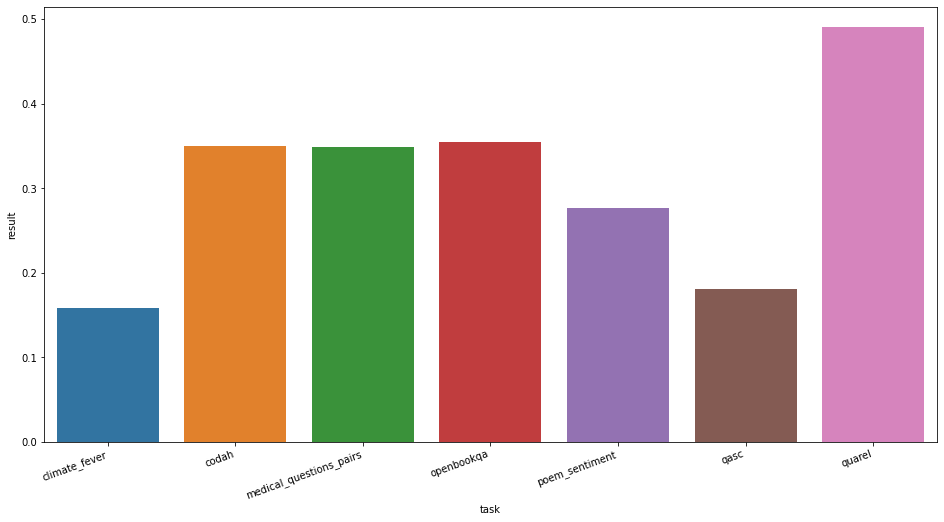

('gpt-j-6B', 'within_task_random')


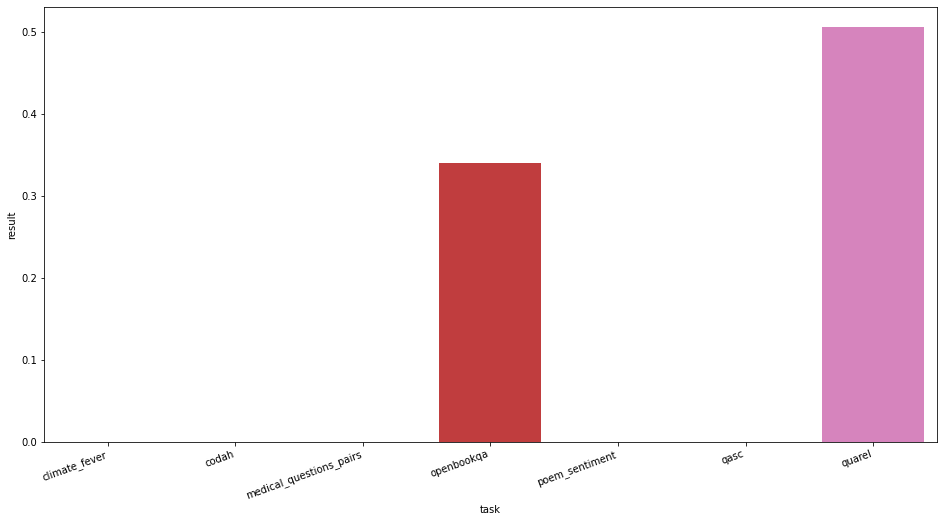

('checkpoints/metaicl/hr_to_lr/model.pt', 'within_task_random')


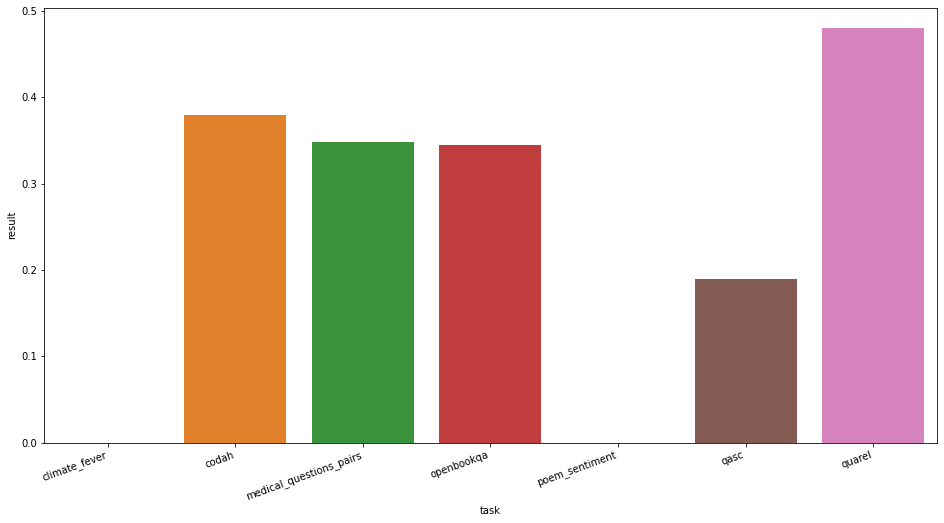

('gpt2-large', 'within_task_random')


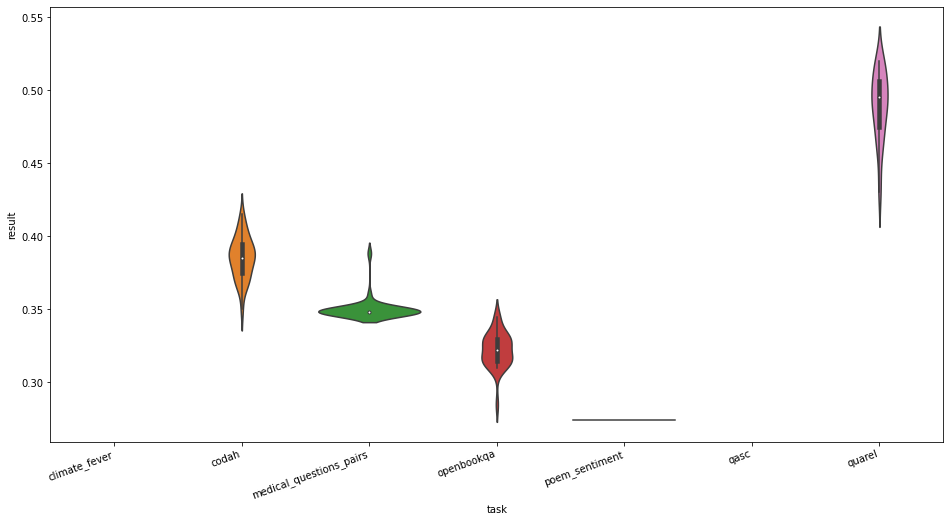

('gpt-j-6B', 'within_task_random')


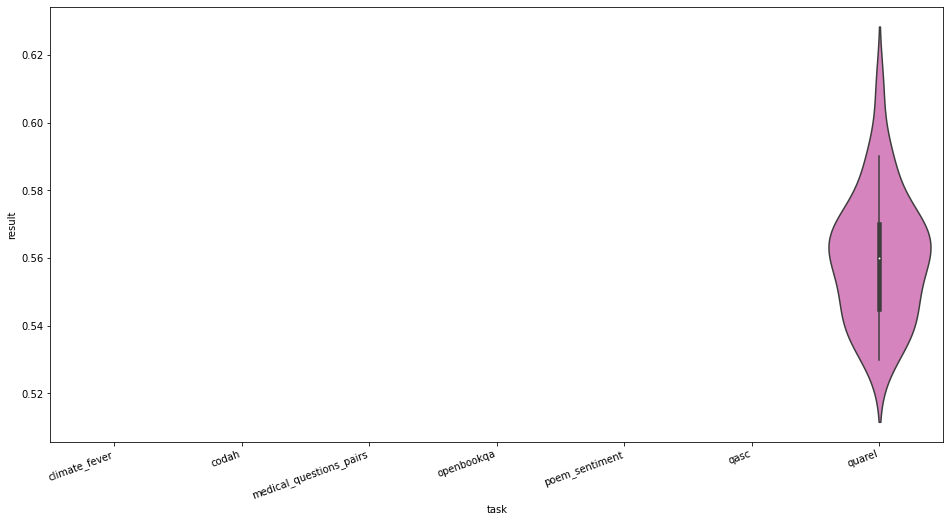

('checkpoints/metaicl/hr_to_lr/model.pt', 'within_task_random')


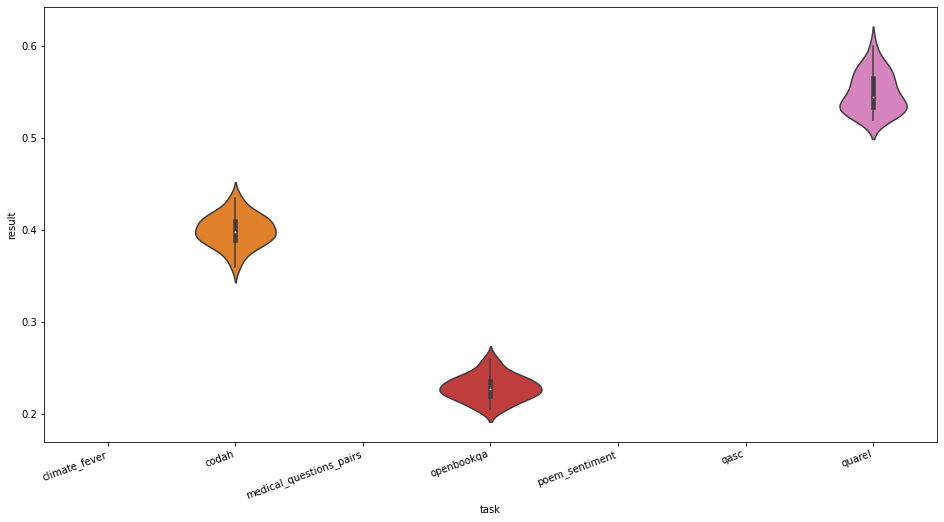

In [3]:
task_order = list(completed_tasks_df.index)
for model in list(set(df['checkpoint_sampling'])):
    print(model)
    plt.figure(figsize=(16, 8))
    data = df[(df.checkpoint_sampling == model) & (df.k == 0)]
    chart = sns.barplot(data=data.groupby('task').mean().reset_index(), x='task', y='result', order=task_order)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
#     sns.violinplot(data=data, x='task', y='result')
    plt.show()
for model in list(set(df['checkpoint_sampling'])):
    print(model)
    plt.figure(figsize=(16, 8))
    data = df[(df.checkpoint_sampling == model) & (df.k == 32)]
    chart = sns.violinplot(data=data, x='task', y='result', order=task_order)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
    plt.show()

### For each task, let's plot the distributions over the scores for the various prompts separated out by the number of examples in the prompts and the model/checkpoint used.

climate_fever


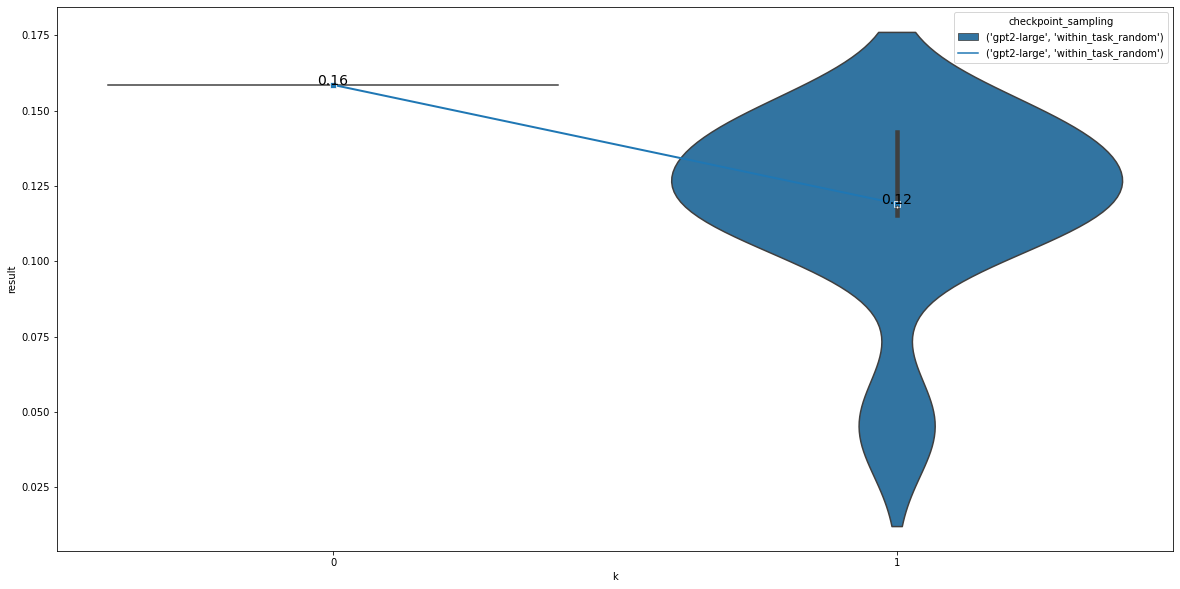

codah


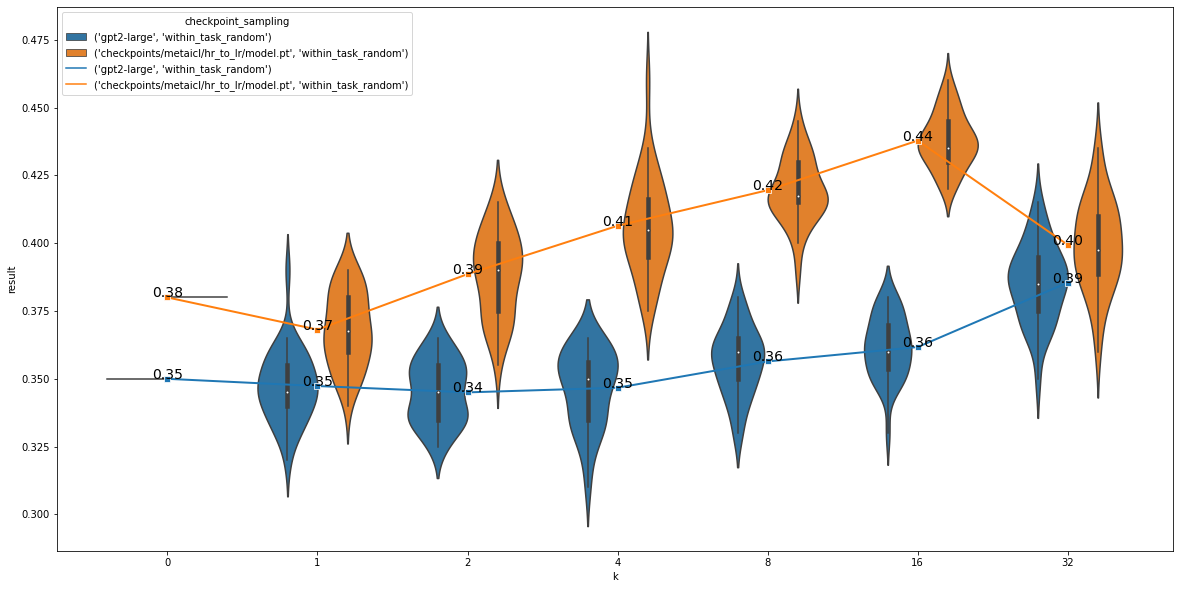

medical_questions_pairs


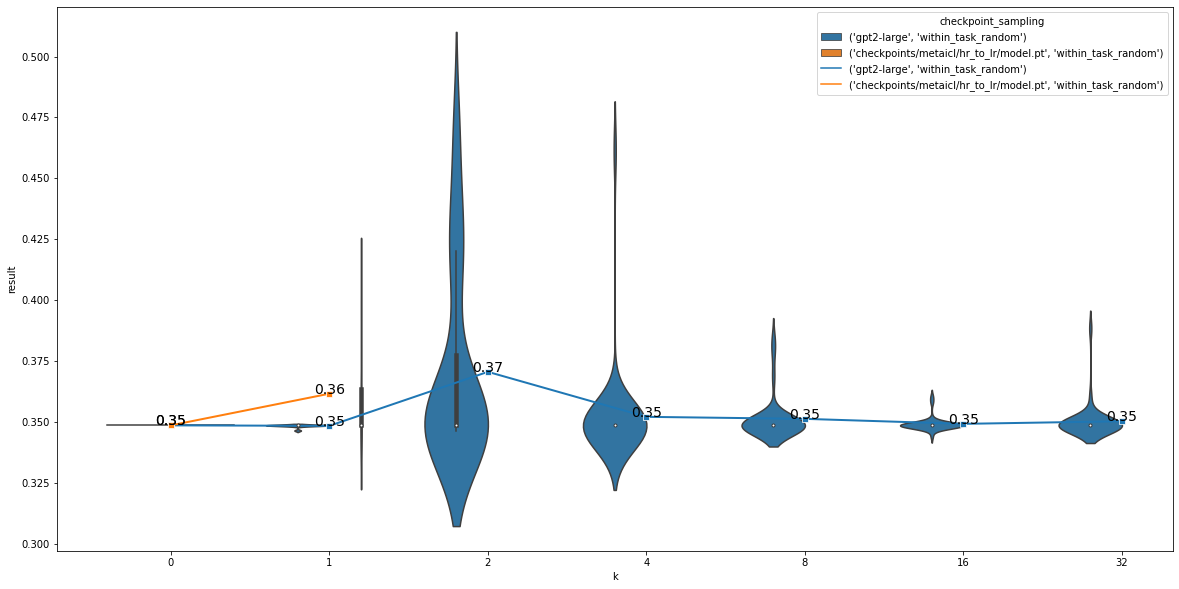

openbookqa


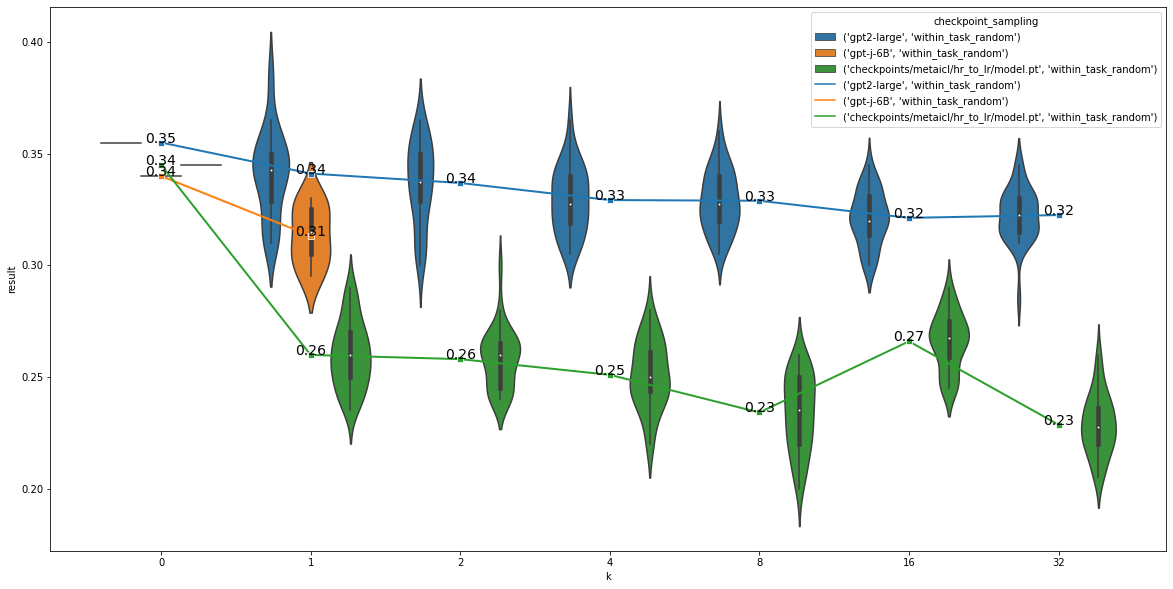

poem_sentiment


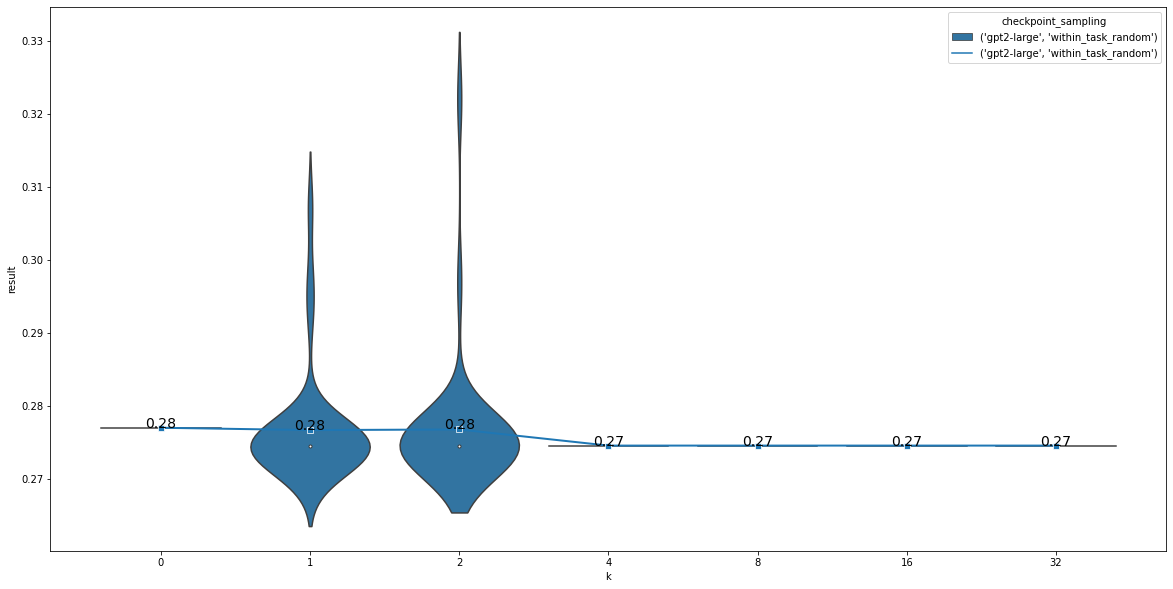

qasc


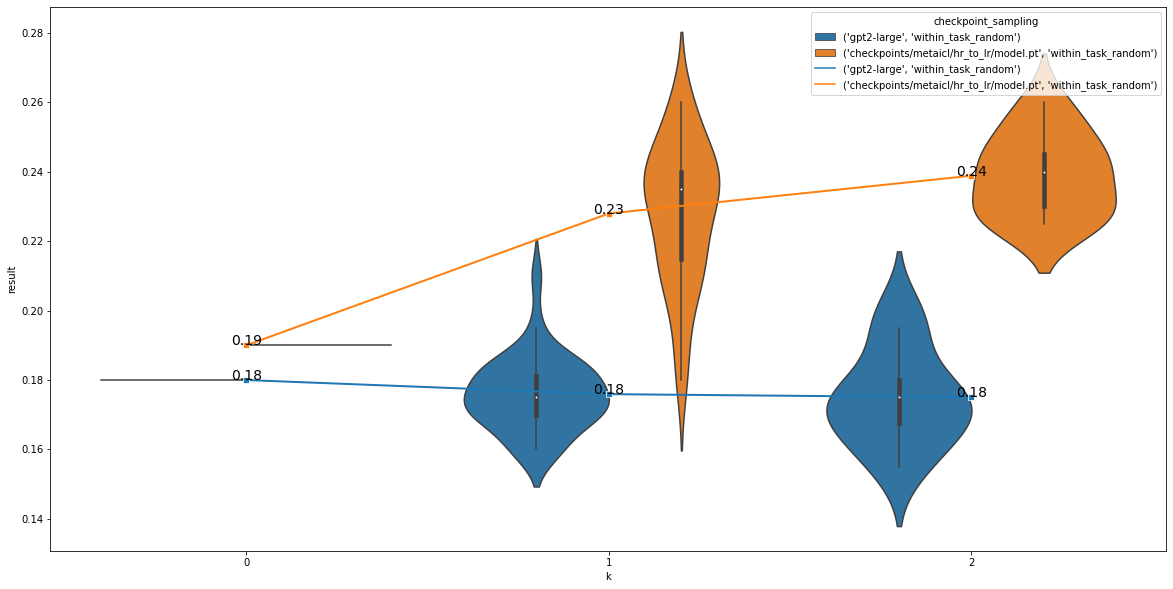

quarel


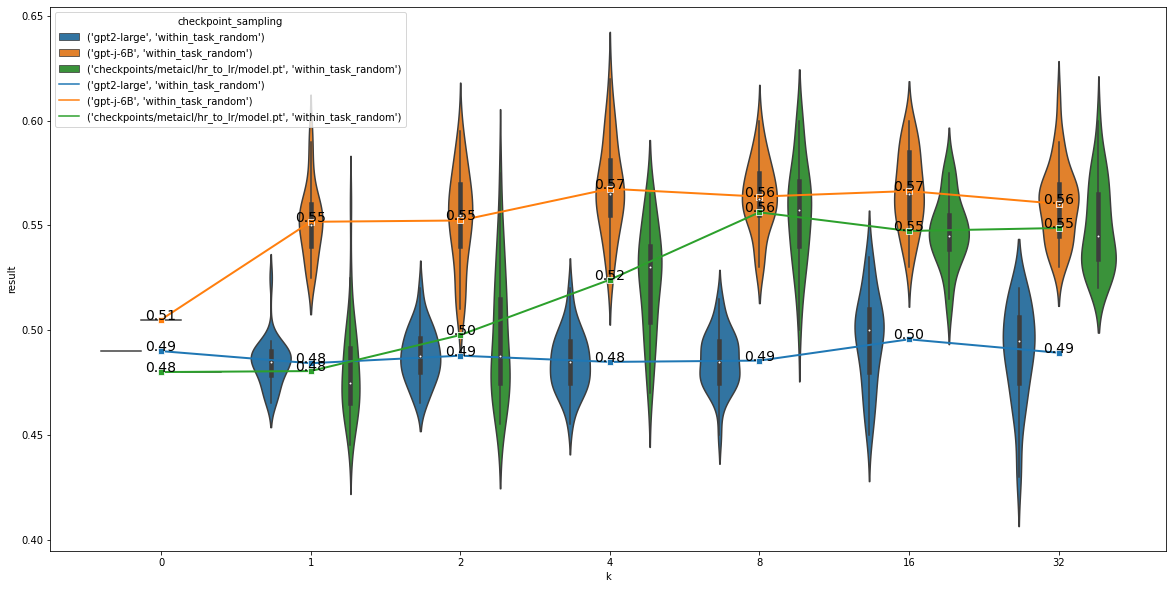

In [4]:


def violinplot_custom(data, order=None, **kwargs):
    if order is None:
        order = list(set(data[kwargs['hue']]))
    data = pd.concat([data[data[kwargs['hue']] == hue] for hue in order])
    mean_data = data.groupby([kwargs['hue'], kwargs['x']]).mean().reset_index()
    mean_data = pd.concat([mean_data[mean_data[kwargs['hue']] == hue] for hue in order])
    chart = sns.violinplot(data=data, **kwargs)
    axis = chart.axis()
    chart = sns.lineplot(data=mean_data, x=kwargs['x_scatter'], y=kwargs['y'], hue=kwargs['hue'], ax=chart, color='black', marker='s', linewidth=2)
    for hue in order:
        for i, (_, row) in enumerate(mean_data[mean_data[kwargs['hue']] == hue].iterrows()):
            chart.annotate('%.2f' % row[kwargs['y']], xy=(i, row[kwargs['y']]), horizontalalignment='center', color='black', fontsize=14)

for task in sorted(list(set(df.task))):
    print(task)
    plt.figure(figsize=(20, 10))
#     sns.violinplot(data=df[df.task == task], x='k', y='result', hue=df[df.task == task][['checkpoint', 'sampling']].apply(tuple, axis=1))
    violinplot_custom(df[df.task == task], x='k', x_scatter='k_scatter', y='result', hue='checkpoint_sampling')
    plt.show()
#     plt.savefig(os.path.join('results_dir', 'accuracy_dists_%s.pdf' % ck))

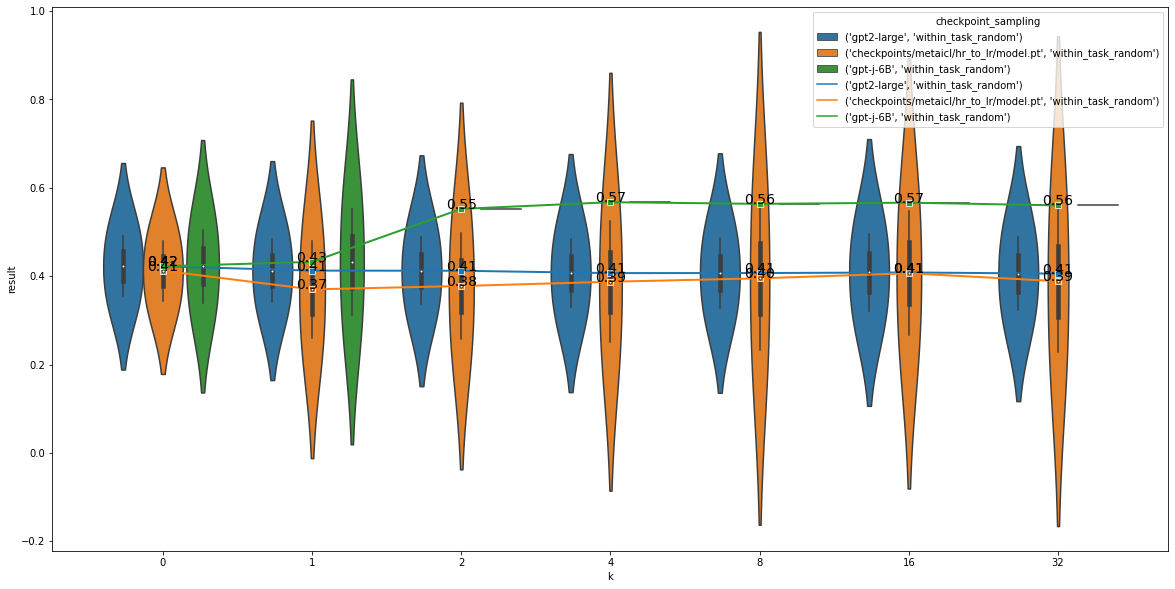

,task,k,checkpoint,sampling,checkpoint_sampling,prompt_seed,result,k_scatter
2,openbookqa,0,gpt2-large,within_task_random,"(gpt2-large, within_task_random)",0.0,0.355000,0.0
5,openbookqa,1,gpt2-large,within_task_random,"(gpt2-large, within_task_random)",15.5,0.341094,1.0
7,openbookqa,2,gpt2-large,within_task_random,"(gpt2-large, within_task_random)",15.5,0.336875,2.0
9,openbookqa,4,gpt2-large,within_task_random,"(gpt2-large, within_task_random)",15.5,0.329219,3.0
11,openbookqa,8,gpt2-large,within_task_random,"(gpt2-large, within_task_random)",15.5,0.328906,4.0
13,openbookqa,16,gpt2-large,within_task_random,"(gpt2-large, within_task_random)",15.5,0.321250,5.0
15,openbookqa,32,gpt2-large,within_task_random,"(gpt2-large, within_task_random)",15.5,0.322500,6.0
18,quarel,0,gpt2-large,within_task_random,"(gpt2-large, within_task_random)",0.0,0.490000,0.0
21,quarel,1,gpt2-large,within_task_random,"(gpt2-large, within_task_random)",15.5,0.484219,1.0
24,quarel,2,gpt2-large,within_task_random,"(gpt2-large, within_task_random)",15.5,0.487812,2.0


In [5]:
# average over the tasks completed on all models/sampling methods
checkpoint_sampling = [
    ('gpt2-large', 'within_task_random'),
#     ('gpt2-large', 'random_wrong_tasks'),
#     ('gpt2-large', 'uncertainty_sampling'),
#     ('gpt2-large', 'uncertainty_sampling_top32'),
    ('checkpoints/metaicl/hr_to_lr/model.pt', 'within_task_random'),
    ('gpt-j-6B', 'within_task_random'),
]
tasks = get_common_completed_tasks(checkpoint_sampling)
temp_df = df[df.apply(lambda r: r.task in tasks and (r.checkpoint, r.sampling) in checkpoint_sampling, axis=1)]
temp_df = temp_df.groupby(['task', 'k', 'checkpoint', 'sampling', 'checkpoint_sampling']).mean().reset_index()
temp_df = pd.concat([
    temp_df[temp_df.checkpoint == 'gpt2-large'],
    temp_df[temp_df.checkpoint == 'checkpoints/metaicl/hr_to_lr/model.pt'],
    temp_df[temp_df.checkpoint == 'gpt-j-6B'],
])
plt.figure(figsize=(20, 10))
# sns.violinplot(data=temp_df, x='k', y='result', hue=temp_df[['checkpoint', 'sampling']].apply(tuple, axis=1))
violinplot_custom(temp_df, x='k', x_scatter='k_scatter', y='result', hue='checkpoint_sampling', order=checkpoint_sampling)
plt.show()
temp_df

In [6]:

# task_corrs = {}
task_k_corrs = []
task_checkpoint_corrs = []
samplings = ['within_task_random', 'random_wrong_tasks', 'uncertainty_sampling', 'uncertainty_sampling_top32']
for task in set(df.task):
    checkpoints = sorted(list(set(df[df.task == task].checkpoint)))
    for ch in checkpoints:
        for sampling in samplings:
            selected_rows = df[(df.task == task) & (df.checkpoint == ch) & (df.sampling == sampling)]
            task_k_corrs.append({
                'task': task,
                'sampling': sampling,
                'checkpoint': ch,
                'k_corr': selected_rows.k.corr(selected_rows.result),
            })
    selected_rows = df[(df.task == task)]
    task_k_corrs.append({
        'task': task,
        'k_corr': selected_rows.k.corr(selected_rows.result),
    })
for task in set(df.task):
    checkpoints = sorted(list(set(df[df.task == task].checkpoint)))
    for i, ch1 in enumerate(checkpoints[:-1]):
        for s1 in samplings:
            ch1_results = df[(df.task==task) & (df.checkpoint==ch1) & (df.sampling == s1)].reset_index().result
            if len(ch1_results) == 0:
                continue
            for ch2 in checkpoints[i + 1:]:
                s2 = s1
                ch2_results = df[(df.task==task) & (df.checkpoint==ch2) & (df.sampling == s2)].reset_index().result
                if len(ch2_results) == 0:
                    continue
                corr = ch1_results.corr(ch2_results)
                (ch1, s1), (ch2, s2) = sorted([(ch1, s1), (ch2, s2)])
                name = ((ch1, s1), (ch2, s2))
                selected_rows = df[(df.task == task) & (
                    ((df.checkpoint == ch1) & (df.sampling == s1)) | 
                    ((df.checkpoint == ch2) & (df.sampling == s2))
                )]
                k_corr = selected_rows.k.corr(selected_rows.result)
                task_checkpoint_corrs.append({
                    'task': task,
                    'between_ckpts': name,
                    'ckpt_corr': corr,
                    'k_corr': k_corr,
                })
task_k_corrs = pd.DataFrame(task_k_corrs)
task_checkpoint_corrs = pd.DataFrame(task_checkpoint_corrs)

In [7]:
task_k_corrs

,task,sampling,checkpoint,k_corr
0,codah,within_task_random,checkpoints/metaicl/hr_to_lr/model.pt,0.296904
1,codah,random_wrong_tasks,checkpoints/metaicl/hr_to_lr/model.pt,NaN
2,codah,uncertainty_sampling,checkpoints/metaicl/hr_to_lr/model.pt,NaN
3,codah,uncertainty_sampling_top32,checkpoints/metaicl/hr_to_lr/model.pt,NaN
4,codah,within_task_random,gpt2-large,0.729738
...,...,...,...,...
58,poem_sentiment,within_task_random,gpt2-large,-0.123974
59,poem_sentiment,random_wrong_tasks,gpt2-large,NaN
60,poem_sentiment,uncertainty_sampling,gpt2-large,NaN
61,poem_sentiment,uncertainty_sampling_top32,gpt2-large,NaN


In [8]:
task_checkpoint_corrs

,task,between_ckpts,ckpt_corr,k_corr
0,codah,"((checkpoints/metaicl/hr_to_lr/model.pt, withi...",0.197052,0.332695
1,medical_questions_pairs,"((checkpoints/metaicl/hr_to_lr/model.pt, withi...",0.144768,-0.143855
2,openbookqa,"((checkpoints/metaicl/hr_to_lr/model.pt, withi...",0.567518,-0.426323
3,openbookqa,"((checkpoints/metaicl/hr_to_lr/model.pt, withi...",0.168426,-0.156455
4,openbookqa,"((gpt-j-6B, within_task_random), (gpt2-large, ...",0.091506,-0.277631
5,quarel,"((checkpoints/metaicl/hr_to_lr/model.pt, withi...",0.342152,0.305748
6,quarel,"((checkpoints/metaicl/hr_to_lr/model.pt, withi...",0.129013,0.304109
7,quarel,"((gpt-j-6B, within_task_random), (gpt2-large, ...",0.194997,0.052092
8,qasc,"((checkpoints/metaicl/hr_to_lr/model.pt, withi...",0.069681,0.133124


### For the each of the tasks, what is the correlation between two different models' scores across the same prompts.

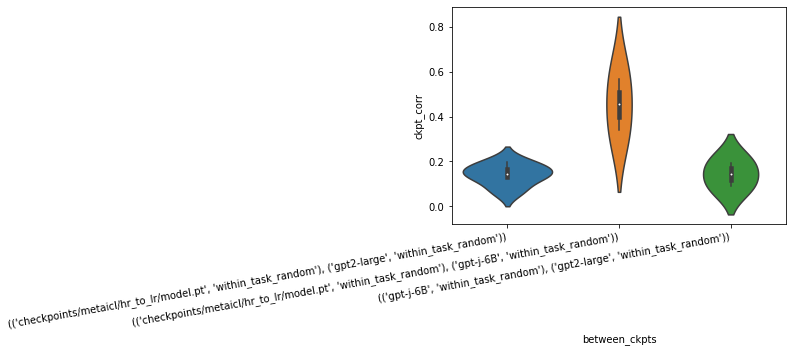

In [9]:
chart = sns.violinplot(data=task_checkpoint_corrs, x='between_ckpts', y='ckpt_corr')
# chart = sns.violinplot(data=task_checkpoint_corrs[task_checkpoint_corrs.between_ckpts=='checkpoints/metaicl/hr_to_lr/model.pt gpt2-large'], x='between_ckpts', y='ckpt_corr')
chart.set_xticklabels(chart.get_xticklabels(), rotation=10, horizontalalignment='right')
None


(('checkpoints/metaicl/hr_to_lr/model.pt', 'within_task_random'), ('gpt-j-6B', 'within_task_random'))


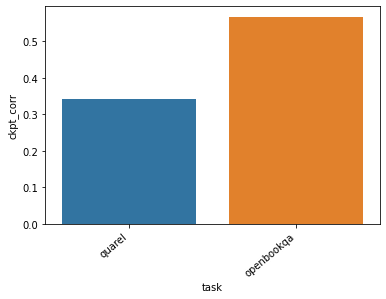

(('checkpoints/metaicl/hr_to_lr/model.pt', 'within_task_random'), ('gpt2-large', 'within_task_random'))


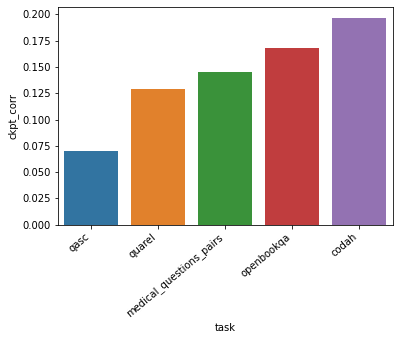

(('gpt-j-6B', 'within_task_random'), ('gpt2-large', 'within_task_random'))


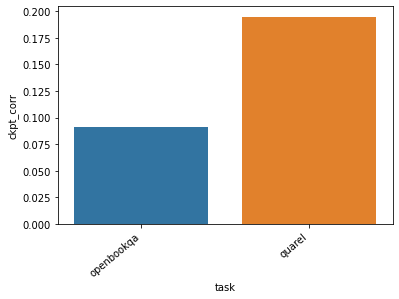

In [10]:
for between_ckpts in sorted(set(task_checkpoint_corrs.between_ckpts)):
    print(between_ckpts)
    chart = sns.barplot(
        data=task_checkpoint_corrs[task_checkpoint_corrs.between_ckpts==between_ckpts].sort_values('ckpt_corr'),
        x='task', y='ckpt_corr')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=40, horizontalalignment='right')
    plt.show()


### For each task, what is the correlation between number of examples in the prompt and the score? In other words, how few-shot-learnable is a task?

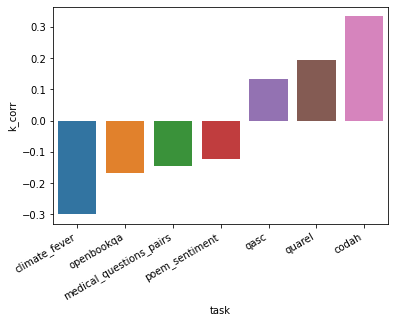

In [11]:
chart = sns.barplot(data=task_k_corrs[task_k_corrs.checkpoint.isna()].sort_values('k_corr'), x='task', y='k_corr')
# chart = sns.barplot(data=task_k_corrs[task_k_corrs.checkpoint == 'checkpoints/metaicl/hr_to_lr/model.pt'].sort_values('k_corr'), x='task', y='k_corr')
# chart = sns.barplot(data=task_k_corrs[task_k_corrs.checkpoint == 'gpt2-large'].sort_values('k_corr'), x='task', y='k_corr')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')
None


### Is the correlation of the scores for different models on a task correlated with how much the task benefits from examples?

In [12]:
# rows = task_checkpoint_corrs
for between_ckpts in sorted(set(task_checkpoint_corrs.between_ckpts)):
    print(between_ckpts)
    rows = task_checkpoint_corrs[task_checkpoint_corrs.between_ckpts==between_ckpts]
    print(rows.ckpt_corr.corr(rows.k_corr))


(('checkpoints/metaicl/hr_to_lr/model.pt', 'within_task_random'), ('gpt-j-6B', 'within_task_random'))
-1.0
(('checkpoints/metaicl/hr_to_lr/model.pt', 'within_task_random'), ('gpt2-large', 'within_task_random'))
0.006785376347133423
(('gpt-j-6B', 'within_task_random'), ('gpt2-large', 'within_task_random'))
1.0


### What does the distribution of few-shot-learnability (correlation of # of examples with score) over tasks for each model look like?

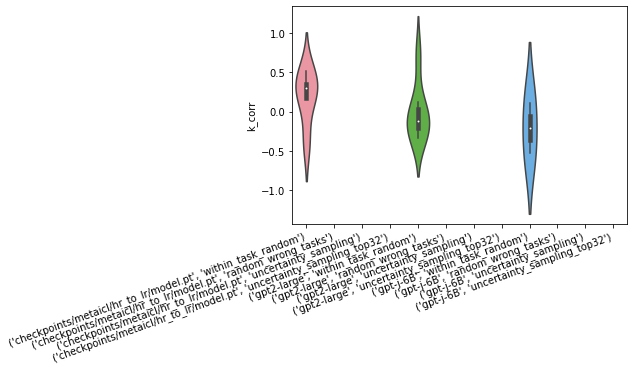

In [13]:
chart = sns.violinplot(
    data=task_k_corrs[~task_k_corrs.checkpoint.isna()],
    x=task_k_corrs[~task_k_corrs.checkpoint.isna()][['checkpoint', 'sampling']].apply(tuple, axis=1),
    y='k_corr')
chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
None

### If a task is few-shot-learnable for one model, does that mean it will be for a different model?

In [14]:
ckpts = sorted(list(set(task_k_corrs[~task_k_corrs.checkpoint.isna()].checkpoint)))
samplings = ['within_task_random']
model_k_corr_corrs = []
for i, ch1 in enumerate(ckpts[:-1]):
    for s1 in samplings:
        for ch2 in ckpts[i + 1:]:
            s2 = s1
            (ch1, s1), (ch2, s2) = sorted([(ch1, s1), (ch2, s2)])
            name = ((ch1, s1), (ch2, s2))
            k_corr_1 = task_k_corrs[(task_k_corrs.checkpoint == ch1) & (task_k_corrs.sampling == s1)].sort_values('task').reset_index().k_corr
            k_corr_2 = task_k_corrs[(task_k_corrs.checkpoint == ch2) & (task_k_corrs.sampling == s2)].sort_values('task').reset_index().k_corr
            model_k_corr_corrs.append({
                'between_ckpts': name,
                'k_corr_corr': k_corr_1.corr(k_corr_2),
            })
model_k_corr_corrs = pd.DataFrame(model_k_corr_corrs)
model_k_corr_corrs

,between_ckpts,k_corr_corr
0,"((checkpoints/metaicl/hr_to_lr/model.pt, withi...",-1.000000
1,"((checkpoints/metaicl/hr_to_lr/model.pt, withi...",-0.104782
2,"((gpt-j-6B, within_task_random), (gpt2-large, ...",1.000000


In [16]:
# eval(df[(df.k==32) & (df.task=='qasc')].iloc[0].train_samples)

tweet_eval-stance_atheism


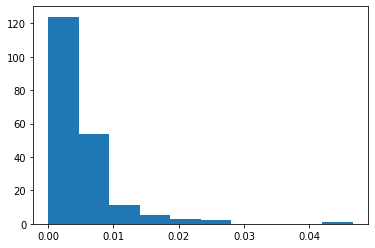

openbookqa


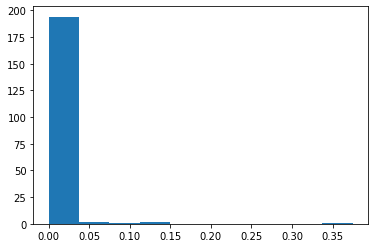

commonsense_qa


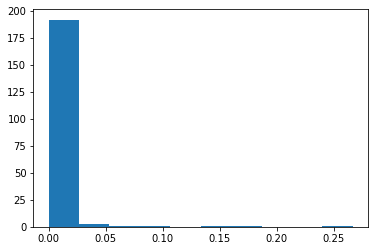

codah


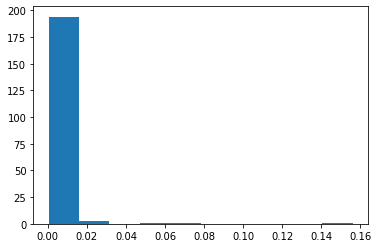

ai2_arc


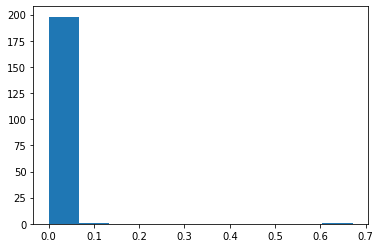

superglue-copa


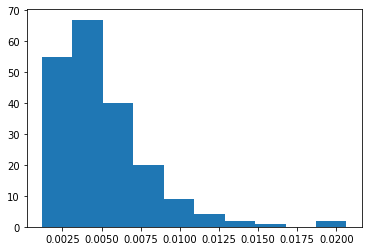

ethos-race


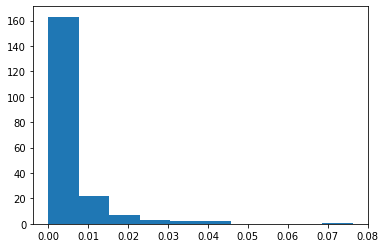

quartz-with_knowledge


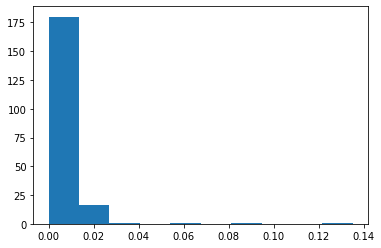

sick


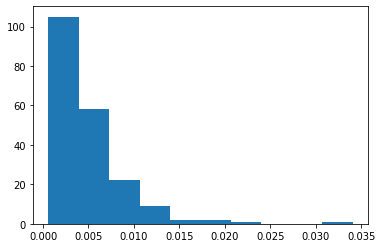

tweet_eval-stance_feminist


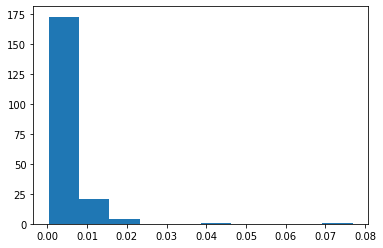

quarel


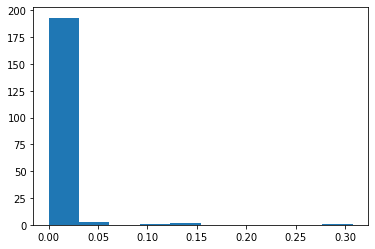

medical_questions_pairs


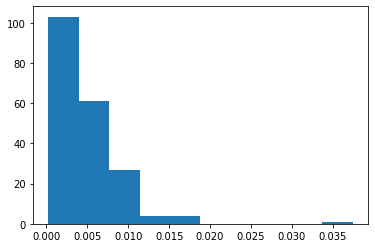

qasc


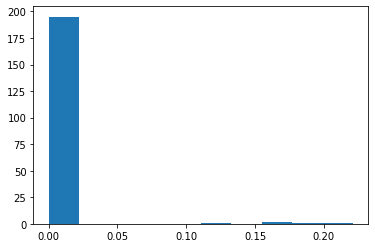

ethos-national_origin


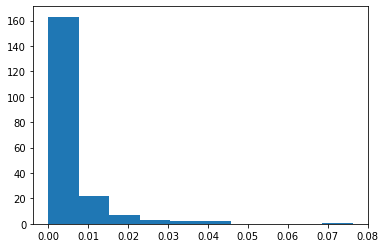

ethos-religion


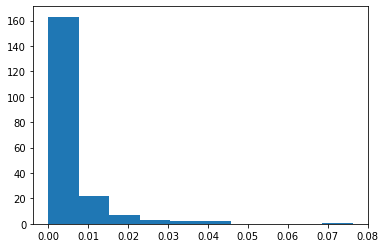

hate_speech18


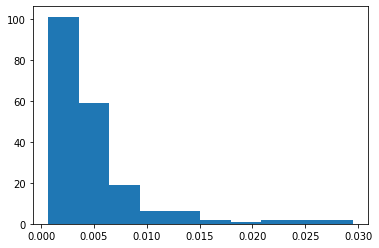

superglue-cb


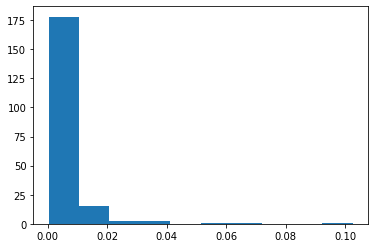

dream


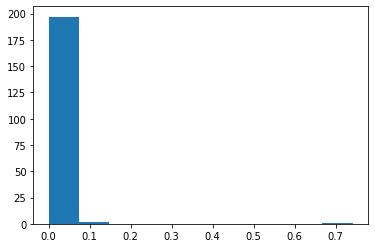

glue-wnli


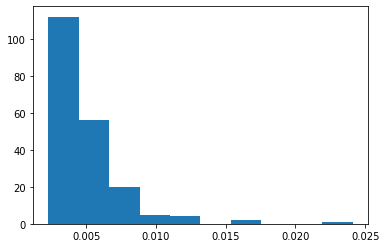

glue-mrpc


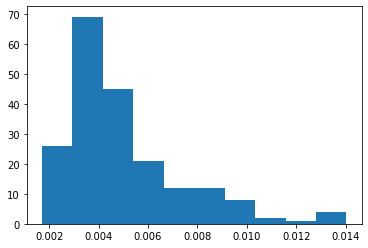

tweet_eval-hate


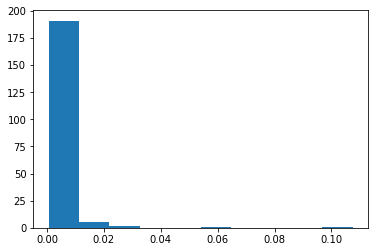

quartz-no_knowledge


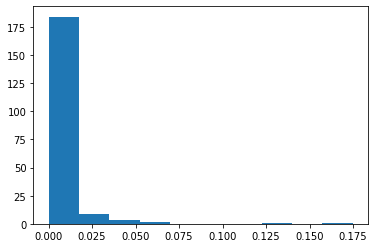

poem_sentiment


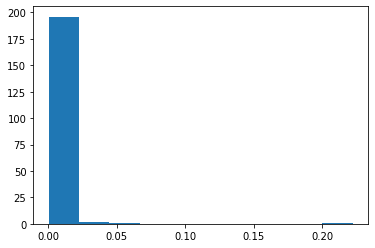

climate_fever


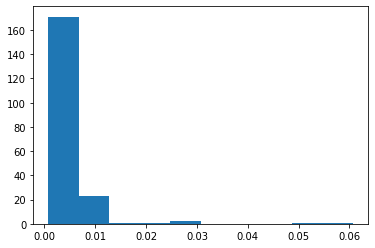

glue-rte


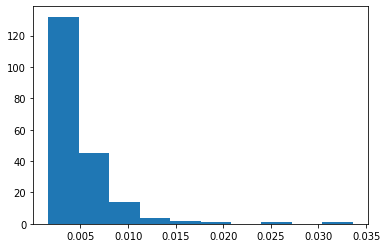

In [19]:
import numpy as np
uncertainty_path = 'results/gpt2_uncertainty_sampling'
for file in os.listdir(uncertainty_path):
    task = file[:-4]
    weights = np.load(os.path.join(uncertainty_path, file))
    print(task)
    plt.hist(weights / weights.sum(keepdims=True))
    plt.show()